In [1]:
using Plots, Statistics, NaNStatistics, LinearAlgebra, Serialization, ParticleFilters, StatsBase

include("../utils/import.jl")
using .Import
using ..Import: State

include("../utils/figs.jl")
using .Figs

# Experiments

## Conditions

**Active Teacher Selection (ATS):** Solve using an approximate POMDP solver (POMCPOW).

**Naive:** Solve by selecting actions randomly for a fixed number of timesteps, making a frequentist estimation of the state, and then always selecting the arm with the highest estimated expected utility thereafter. 

# Plots
## Set Parameters
### Experiment Names

In [2]:
# ATS
pomdp_expIDs = ["22128_"*x for x in ["051526", "055025", "06251", "07242", "075856", "083337", "09080", "100546", "10400", "113044", "120617", "130613", "13588", "143446", "15378", "161233", "164944", "174134", "184340", "192058"]]

# Naive
naive_expIDs1 = ["base_naive_22127_194"*x for x in ["857", "913", "929", "945"]]
naive_expIDs2 = ["base_naive_22127_195"*x for x in ["01", "017", "033", "049", "15", "120", "136", "152", "28", "224", "240", "255", "311", "327", "343", "358"]]
naive_expIDs = cat(naive_expIDs1, naive_expIDs2, dims=1)
;

### Experiment Parameters

In [3]:
runs = 25
actions = ["C1", "C2", "C3", "B1", "B2", "B3"]
pomdp_name, naive_name = "ATS", "Naive";

### Plotting Parameters

In [4]:
window = 100
labels = [pomdp_name naive_name];

## Import Data

### Import ATS experiments

In [5]:
@time begin
    println("importing exp="*string(pomdp_name)*" 1 (exp "*pomdp_expIDs[1]*") data...")
    s_p1, t_p1, a_p1, r_p1 = Import.get_star(pomdp_expIDs[1], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 2 (exp "*pomdp_expIDs[2]*") data...")
    s_p2, t_p2, a_p2, r_p2 = Import.get_star(pomdp_expIDs[2], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 3 (exp "*pomdp_expIDs[3]*") data...")
    s_p3, t_p3, a_p3, r_p3 = Import.get_star(pomdp_expIDs[3], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 4 (exp "*pomdp_expIDs[4]*") data...")
    s_p4, t_p4, a_p4, r_p4 = Import.get_star(pomdp_expIDs[4], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 5 (exp "*pomdp_expIDs[5]*") data...")
    s_p5, t_p5, a_p5, r_p5 = Import.get_star(pomdp_expIDs[5], runs, "..")
end
;

importing exp=ATS 1 (exp 22128_051526) data...
  0.232858 seconds (788.32 k allocations: 45.679 MiB, 6.29% gc time, 93.33% compilation time)
importing exp=ATS 2 (exp 22128_055025) data...
  0.013498 seconds (101.97 k allocations: 10.202 MiB)
importing exp=ATS 3 (exp 22128_06251) data...
  0.012569 seconds (101.97 k allocations: 10.198 MiB)
importing exp=ATS 4 (exp 22128_07242) data...
  0.012740 seconds (101.97 k allocations: 10.211 MiB)
importing exp=ATS 5 (exp 22128_075856) data...
  0.012882 seconds (101.97 k allocations: 10.213 MiB)


In [6]:
@time begin
    println("importing exp="*string(pomdp_name)*" 6 (exp "*pomdp_expIDs[6]*") data...")
    s_p6, t_p6, a_p6, r_p6 = Import.get_star(pomdp_expIDs[6], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 7 (exp "*pomdp_expIDs[7]*") data...")
    s_p7, t_p7, a_p7, r_p7 = Import.get_star(pomdp_expIDs[7], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 8 (exp "*pomdp_expIDs[8]*") data...")
    s_p8, t_p8, a_p8, r_p8 = Import.get_star(pomdp_expIDs[8], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 9 (exp "*pomdp_expIDs[9]*") data...")
    s_p9, t_p9, a_p9, r_p9 = Import.get_star(pomdp_expIDs[9], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 10 (exp "*pomdp_expIDs[10]*") data...")
    s_p10, t_p10, a_p10, r_p10 = Import.get_star(pomdp_expIDs[10], runs, "..")
end
;

importing exp=ATS 6 (exp 22128_083337) data...
  0.012478 seconds (101.97 k allocations: 10.279 MiB)
importing exp=ATS 7 (exp 22128_09080) data...
  0.026839 seconds (101.97 k allocations: 10.199 MiB, 51.34% gc time)
importing exp=ATS 8 (exp 22128_100546) data...
  0.013304 seconds (101.97 k allocations: 10.284 MiB)
importing exp=ATS 9 (exp 22128_10400) data...
  0.012832 seconds (101.97 k allocations: 10.285 MiB)
importing exp=ATS 10 (exp 22128_113044) data...
  0.012790 seconds (101.97 k allocations: 10.201 MiB)


In [7]:
@time begin
    println("importing exp="*string(pomdp_name)*" 11 (exp "*pomdp_expIDs[11]*") data...")
    s_p11, t_p11, a_p11, r_p11 = Import.get_star(pomdp_expIDs[11], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 12 (exp "*pomdp_expIDs[12]*") data...")
    s_p12, t_p12, a_p12, r_p12 = Import.get_star(pomdp_expIDs[12], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 13 (exp "*pomdp_expIDs[13]*") data...")
    s_p13, t_p13, a_p13, r_p13, = Import.get_star(pomdp_expIDs[13], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 14 (exp "*pomdp_expIDs[14]*") data...")
    s_p14, t_p14, a_p14, r_p14 = Import.get_star(pomdp_expIDs[14], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 15 (exp "*pomdp_expIDs[15]*") data...")
    s_p15, t_p15, a_p15, r_p15 = Import.get_star(pomdp_expIDs[15], runs, "..")
end
;

importing exp=ATS 11 (exp 22128_120617) data...
  0.012352 seconds (101.97 k allocations: 10.202 MiB)
importing exp=ATS 12 (exp 22128_130613) data...
  0.012853 seconds (101.97 k allocations: 10.201 MiB)
importing exp=ATS 13 (exp 22128_13588) data...
  0.012680 seconds (101.97 k allocations: 10.285 MiB)
importing exp=ATS 14 (exp 22128_143446) data...
  0.012793 seconds (102.07 k allocations: 10.215 MiB)
importing exp=ATS 15 (exp 22128_15378) data...
  0.012701 seconds (101.97 k allocations: 10.210 MiB)


In [8]:
@time begin
    println("importing exp="*string(pomdp_name)*" 16 (exp "*pomdp_expIDs[16]*") data...")
    s_p16, t_p16, a_p16, r_p16 = Import.get_star(pomdp_expIDs[16], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 17 (exp "*pomdp_expIDs[17]*") data...")
    s_p17, t_p17, a_p17, r_p17 = Import.get_star(pomdp_expIDs[17], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 18 (exp "*pomdp_expIDs[18]*") data...")
    s_p18, t_p18, a_p18, r_p18 = Import.get_star(pomdp_expIDs[18], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 19 (exp "*pomdp_expIDs[19]*") data...")
    s_p19, t_p19, a_p19, r_p19 = Import.get_star(pomdp_expIDs[19], runs, "..")
end
@time begin
    println("importing exp="*string(pomdp_name)*" 20 (exp "*pomdp_expIDs[20]*") data...")
    s_p20, t_p20, a_p20, r_p20 = Import.get_star(pomdp_expIDs[20], runs, "..")
end
;

importing exp=ATS 16 (exp 22128_161233) data...
  0.027887 seconds (101.97 k allocations: 10.213 MiB, 53.94% gc time)
importing exp=ATS 17 (exp 22128_164944) data...
  0.013429 seconds (101.97 k allocations: 10.206 MiB)
importing exp=ATS 18 (exp 22128_174134) data...
  0.013294 seconds (101.97 k allocations: 10.287 MiB)
importing exp=ATS 19 (exp 22128_184340) data...
  0.012584 seconds (101.97 k allocations: 10.201 MiB)
importing exp=ATS 20 (exp 22128_192058) data...
  0.012881 seconds (101.97 k allocations: 10.283 MiB)


### Import Naive experiments

In [9]:
@time begin
    println("importing exp="*string(naive_name)*" 1 (exp "*naive_expIDs[1]*") data...")
    s_n1, t_n1, a_n1, r_n1 = Import.get_star(naive_expIDs[1], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 2 (exp "*naive_expIDs[2]*") data...")
    s_n2, t_n2, a_n2, r_n2 = Import.get_star(naive_expIDs[2], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 3 (exp "*naive_expIDs[3]*") data...")
    s_n3, t_n3, a_n3, r_n3 = Import.get_star(naive_expIDs[3], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 4 (exp "*naive_expIDs[4]*") data...")
    s_n4, t_n4, a_n4, r_n4 = Import.get_star(naive_expIDs[4], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 5 (exp "*naive_expIDs[5]*") data...")
    s_n5, t_n5, a_n5, r_n5 = Import.get_star(naive_expIDs[5], runs, "..")
end
;

importing exp=Naive 1 (exp base_naive_22127_194857) data...
  0.009107 seconds (101.99 k allocations: 10.205 MiB)
importing exp=Naive 2 (exp base_naive_22127_194913) data...
  0.009147 seconds (102.09 k allocations: 10.214 MiB)
importing exp=Naive 3 (exp base_naive_22127_194929) data...
  0.010695 seconds (101.99 k allocations: 10.205 MiB)
importing exp=Naive 4 (exp base_naive_22127_194945) data...
  0.011062 seconds (101.99 k allocations: 10.205 MiB)
importing exp=Naive 5 (exp base_naive_22127_19501) data...
  0.010513 seconds (101.98 k allocations: 10.203 MiB)


In [10]:
@time begin
    println("importing exp="*string(naive_name)*" 6 (exp "*naive_expIDs[6]*") data...")
    s_n6, t_n6, a_n6, r_n6 = Import.get_star(naive_expIDs[6], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 7 (exp "*naive_expIDs[7]*") data...")
    s_n7, t_n7, a_n7, r_n7 = Import.get_star(naive_expIDs[7], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 8 (exp "*naive_expIDs[8]*") data...")
    s_n8, t_n8, a_n8, r_n8 = Import.get_star(naive_expIDs[8], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 9 (exp "*naive_expIDs[9]*") data...")
    s_n9, t_n9, a_n9, r_n9 = Import.get_star(naive_expIDs[9], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 10 (exp "*naive_expIDs[10]*") data...")
    s_n10, t_n10, a_n10, r_n10 = Import.get_star(naive_expIDs[10], runs, "..")
end
;

importing exp=Naive 6 (exp base_naive_22127_195017) data...
  0.028910 seconds (101.99 k allocations: 10.204 MiB, 58.76% gc time)
importing exp=Naive 7 (exp base_naive_22127_195033) data...
  0.010966 seconds (101.99 k allocations: 10.205 MiB)
importing exp=Naive 8 (exp base_naive_22127_195049) data...
  0.010663 seconds (101.99 k allocations: 10.205 MiB)
importing exp=Naive 9 (exp base_naive_22127_19515) data...
  0.010435 seconds (101.98 k allocations: 10.204 MiB)
importing exp=Naive 10 (exp base_naive_22127_195120) data...
  0.010185 seconds (101.99 k allocations: 10.205 MiB)


In [11]:
@time begin
    println("importing exp="*string(naive_name)*" 11 (exp "*naive_expIDs[11]*") data...")
    s_n11, t_n11, a_n11, r_n11 = Import.get_star(naive_expIDs[11], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 12 (exp "*naive_expIDs[12]*") data...")
    s_n12, t_n12, a_n12, r_n12 = Import.get_star(naive_expIDs[12], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 13 (exp "*naive_expIDs[13]*") data...")
    s_n13, t_n13, a_n13, r_n13 = Import.get_star(naive_expIDs[13], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 14 (exp "*naive_expIDs[14]*") data...")
    s_n14, t_n14, a_n14, r_n14 = Import.get_star(naive_expIDs[14], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 15 (exp "*naive_expIDs[15]*") data...")
    s_n15, t_n15, a_n15, r_n15 = Import.get_star(naive_expIDs[15], runs, "..")
end
;

importing exp=Naive 11 (exp base_naive_22127_195136) data...
  0.012080 seconds (101.99 k allocations: 10.205 MiB)
importing exp=Naive 12 (exp base_naive_22127_195152) data...
  0.010802 seconds (101.99 k allocations: 10.205 MiB)
importing exp=Naive 13 (exp base_naive_22127_19528) data...
  0.010634 seconds (101.98 k allocations: 10.374 MiB)
importing exp=Naive 14 (exp base_naive_22127_195224) data...
  0.010969 seconds (101.99 k allocations: 10.204 MiB)
importing exp=Naive 15 (exp base_naive_22127_195240) data...
  0.010381 seconds (101.99 k allocations: 10.204 MiB)


In [12]:
@time begin
    println("importing exp="*string(naive_name)*" 16 (exp "*naive_expIDs[16]*") data...")
    s_n16, t_n16, a_n16, r_n16 = Import.get_star(naive_expIDs[16], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 17 (exp "*naive_expIDs[17]*") data...")
    s_n17, t_n17, a_n17, r_n17 = Import.get_star(naive_expIDs[17], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 18 (exp "*naive_expIDs[18]*") data...")
    s_n18, t_n18, a_n18, r_n18 = Import.get_star(naive_expIDs[18], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 19 (exp "*naive_expIDs[19]*") data...")
    s_n19, t_n19, a_n19, r_n19 = Import.get_star(naive_expIDs[19], runs, "..")
end
@time begin
    println("importing exp="*string(naive_name)*" 20 (exp "*naive_expIDs[20]*") data...")
    s_n20, t_n20, a_n20, r_n20 = Import.get_star(naive_expIDs[20], runs, "..")
end
;

importing exp=Naive 16 (exp base_naive_22127_195255) data...
  0.010342 seconds (101.99 k allocations: 10.205 MiB)
importing exp=Naive 17 (exp base_naive_22127_195311) data...
  0.025830 seconds (101.99 k allocations: 10.205 MiB, 58.17% gc time)
importing exp=Naive 18 (exp base_naive_22127_195327) data...
  0.010630 seconds (101.99 k allocations: 10.205 MiB)
importing exp=Naive 19 (exp base_naive_22127_195343) data...
  0.011013 seconds (101.99 k allocations: 10.205 MiB)
importing exp=Naive 20 (exp base_naive_22127_195358) data...
  0.012237 seconds (101.99 k allocations: 10.205 MiB)


In [13]:
# combine data across experiments for each condition
t_p = t_p1
s_p = [cat(s_p1, s_p2, s_p3, s_p4, s_p5, s_p6, s_p7, s_p8, s_p9, s_p10, s_p11, s_p12, s_p13, s_p14, s_p15, s_p16, s_p17, s_p18, s_p19, s_p20, dims=1)[runs*i] for i in 1:20]
a_p = cat(a_p1, a_p2, a_p3, a_p4, a_p5, a_p6, a_p7, a_p8, a_p9, a_p10, a_p11, a_p12, a_p13, a_p14, a_p15, a_p16, a_p17, a_p18, a_p19, a_p20, dims=1)
r_p = cat(r_p1, r_p2, r_p3, r_p4, r_p5, r_p6, r_p7, r_p8, r_p9, r_p10, r_p11, r_p12, r_p13, r_p14, r_p15, r_p16, r_p17, r_p18, r_p19, r_p20, dims=1)

t_n = t_n1
s_n = [cat(s_n1, s_n2, s_n3, s_n4, s_n5, s_n6, s_n7, s_n8, s_n9, s_n10, s_n11, s_n12, s_n13, s_n14, s_n15, s_n16, s_n17, s_n18, s_n19, s_n20, dims=1)[runs*i] for i in 1:20]
a_n = cat(a_n1, a_n2, a_n3, a_n4, a_n5, a_n6, a_n7, a_n8, a_n9, a_n10, a_n11, a_n12, a_n13, a_n14, a_n15, a_n16, a_n17, a_n18, a_n19, a_n20, dims=1)
r_n = cat(r_n1, r_n2, r_n3, r_n4, r_n5, r_n6, r_n7, r_n8, r_n9, r_n10, r_n11, r_n12, r_n13, r_n14, r_n15, r_n16, r_n17, r_n18, r_n19, r_n20, dims=1)
;

## Analysis
### General

In [14]:
function print_state(s::State)
    println("\t u: ", s.u)
    println("\t d1: ", s.d[1], "\t (exp val ", dot(s.u, s.d[1]), ")")
    println("\t d1: ", s.d[2], "\t (exp val ", dot(s.u, s.d[2]), ")")
    println("\t d1: ", s.d[3], "\t (exp val ", dot(s.u, s.d[3]), ")")
end

print_state (generic function with 1 method)

In [15]:
# all runs under a given expID have the same start state & optimal action
println("** "*pomdp_name*" condition **")
for i in 1:length(pomdp_expIDs)
    optimal_action, highest_R = Import.get_optimal_arm(s_p[i])

    println("State "*string(i)*":")
    print_state(s_n[i])
    println("Highest-Reward Arm:\t"*string(optimal_action)*" (R="*string(highest_R)*")\n")
end
println("** "*naive_name*" condition **")
for i in 1:length(naive_expIDs)
    optimal_action, highest_R = Import.get_optimal_arm(s_n[i])
    
    println("State "*string(i)*":")
    print_state(s_n[i])
    println("Highest-Reward Arm:\t"*string(optimal_action)*" (R="*string(highest_R)*")\n")
end

** ATS condition **
State 1:
	 u: [5.0, 0.0, 0.0]
	 d1: [0.5, 0.0, 0.5]	 (exp val 2.5)
	 d1: [0.0, 0.5, 0.5]	 (exp val 0.0)
	 d1: [0.0, 0.5, 0.5]	 (exp val 0.0)
Highest-Reward Arm:	C1 (R=2.5)

State 2:
	 u: [5.0, 0.0, 5.0]
	 d1: [0.5, 0.0, 0.5]	 (exp val 5.0)
	 d1: [0.0, 0.5, 0.5]	 (exp val 2.5)
	 d1: [0.0, 0.5, 0.5]	 (exp val 2.5)
Highest-Reward Arm:	C1 (R=5.0)

State 3:
	 u: [5.0, 0.0, 10.0]
	 d1: [0.5, 0.0, 0.5]	 (exp val 7.5)
	 d1: [0.0, 0.5, 0.5]	 (exp val 5.0)
	 d1: [0.0, 0.5, 0.5]	 (exp val 5.0)
Highest-Reward Arm:	C1 (R=7.5)

State 4:
	 u: [10.0, 0.0, 0.0]
	 d1: [0.5, 0.5, 0.0]	 (exp val 5.0)
	 d1: [0.0, 0.5, 0.5]	 (exp val 0.0)
	 d1: [0.0, 0.5, 0.5]	 (exp val 0.0)
Highest-Reward Arm:	C1 (R=5.0)

State 5:
	 u: [5.0, 5.0, 10.0]
	 d1: [0.0, 0.5, 0.5]	 (exp val 7.5)
	 d1: [0.5, 0.5, 0.0]	 (exp val 5.0)
	 d1: [0.5, 0.5, 0.0]	 (exp val 5.0)
Highest-Reward Arm:	C1 (R=7.5)

State 6:
	 u: [5.0, 10.0, 10.0]
	 d1: [0.0, 0.5, 0.5]	 (exp val 10.0)
	 d1: [0.5, 0.5, 0.0]	 (exp val 7.5)
	 d1:

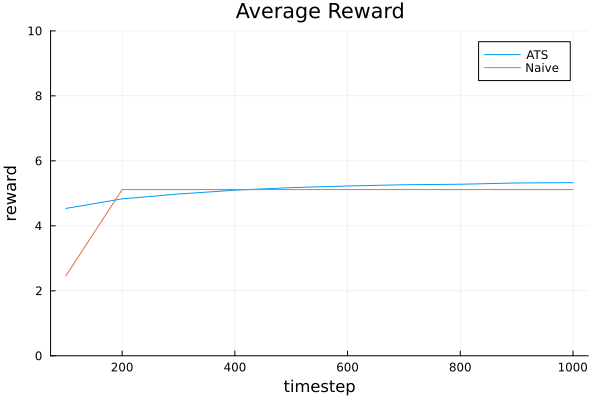

In [16]:
Figs.plot_avg_r_multiple_experiments([r_p, r_n], window, labels, "Average Reward")

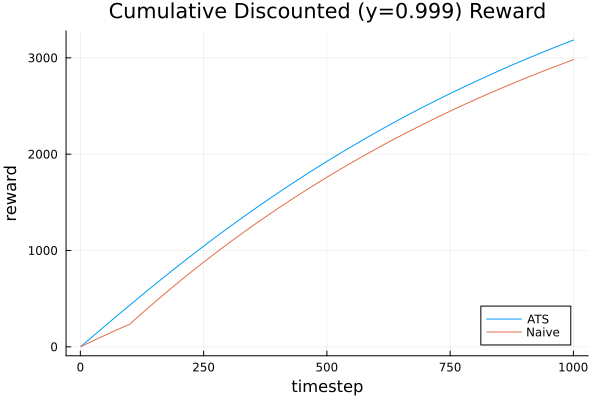

In [17]:
y = 0.999
Figs.plot_cumulative_avg_r_multiple_experiments([r_p, r_n], y, labels, "Cumulative Discounted (y="*string(y)*") Reward")

## Action Distributions

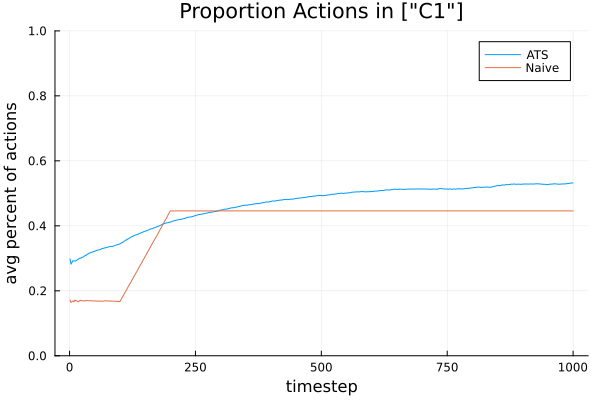

In [18]:
Figs.plot_actions_in_list_rolling_multiple_experiments([a_p, a_n], ["C1"], window, labels, "Proportion Actions in ")

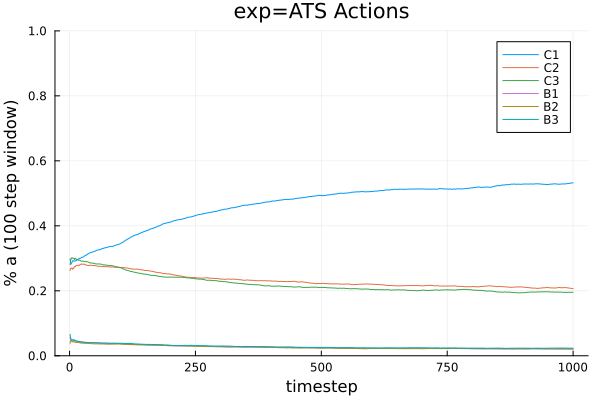

In [19]:
Figs.plot_proportion_actions_all(a_p, actions, window, "exp="*pomdp_name*" Actions")

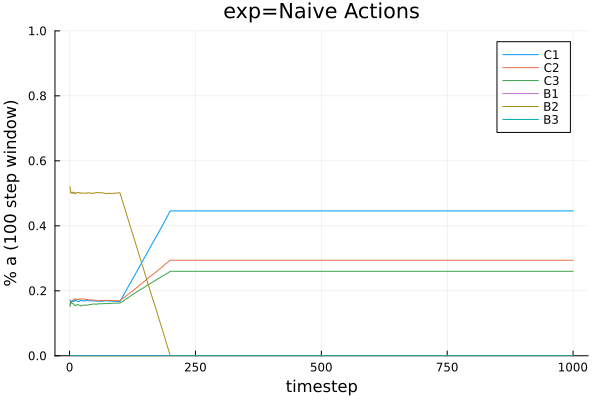

In [20]:
Figs.plot_proportion_actions_all(a_n, actions, window, "exp="*naive_name*" Actions")